In [1]:
import numpy as np
import math
import perceval as pcvl
from perceval.components import PS, BS, PERM, Port
from perceval.utils import Encoding
from perceval.rendering.circuit import SymbSkin, PhysSkin

In [21]:
phase = math.pi
circuit = pcvl.Circuit(4)

theta1 = 2*math.pi*54.74/180
theta2 = 2*math.pi*17.63/180

In [22]:
circuit = (circuit
            .add(0, PS(phase))
            .add(3, PS(phase))
            .add((1,2), PERM([1, 0]))
            .add((0, 1), BS.H(theta=theta1))
            .add((2, 3), BS.H(theta=theta1))
            .add((1,2), PERM([1, 0]))
            .add((0, 1), BS.H(theta=-theta1))
            .add((2, 3), BS.H(theta=theta2))
            )

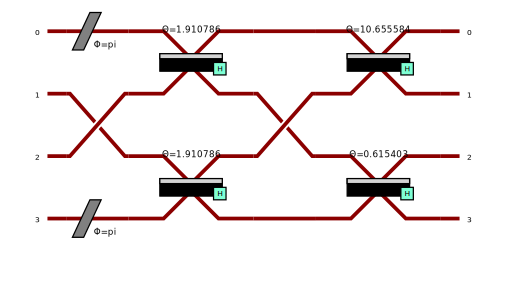

In [23]:
pcvl.pdisplay(circuit, skin=PhysSkin())

In [36]:
CZ_gate = (pcvl.Circuit(6, name="CZ")
                .add(1, PERM([1, 0]))
                .add(2, circuit, merge=True)
                .add(1, PERM([1, 0])))

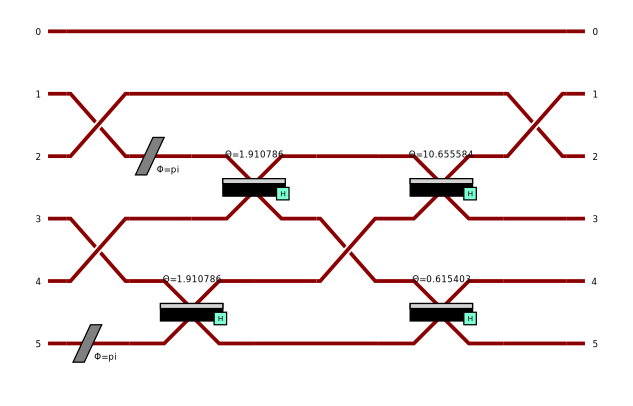

In [37]:
pcvl.pdisplay(CZ_gate, skin=PhysSkin())

In [14]:
processor = pcvl.Processor("SLOS", CZ_gate)
processor = (processor
                .add_port(0, Port(Encoding.DUAL_RAIL, 'ctrl'))
                .add_port(2, Port(Encoding.DUAL_RAIL, 'data'))
                .add_herald(4, 1)
                .add_herald(5, 1)
                )

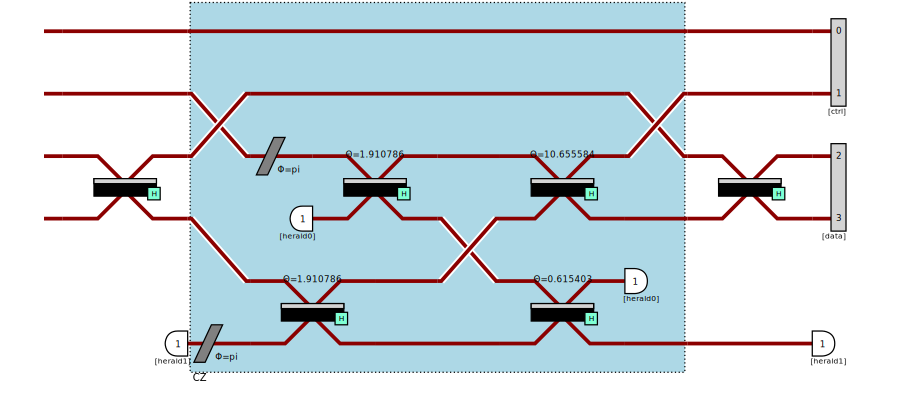

In [38]:
pcvl.pdisplay(pro2, recursive=True)

In [40]:
from perceval.components import catalog
print(catalog.list())

['klm cnot', 'heralded cnot', 'postprocessed cnot', 'heralded cz', 'generic 2 mode circuit', 'mzi phase first', 'mzi phase last', 'postprocessed ccz', 'toffoli']


HERALDED CZ DOCUMENTATION
--------------------------

CZ gate with 2 heralded modes

Scientific article reference: https://arxiv.org/abs/quant-ph/0110144

Schema:
                      ╭─────╮
ctrl (dual rail) ─────┤     ├───── ctrl (dual rail)
                 ─────┤     ├─────
                      │     │
data (dual rail) ─────┤     ├───── data (dual rail)
                 ─────┤     ├─────
                      ╰─────╯



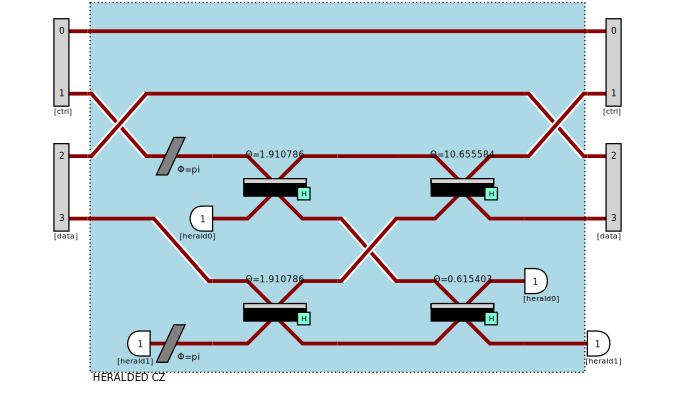

In [10]:
print(catalog['heralded cz'].doc)
circ = catalog['heralded cz'].build_processor()

pcvl.pdisplay(circ, recursive=True,  render_size=1)

In [47]:
pro2 = pcvl.Processor("SLOS", 4)
pro2.add(2, pcvl.BS.H())
pro2.add(0, processor) # pcvl.catalog["heralded cz"].build_processor())
pro2.add(2, pcvl.BS.H())

states = {
    pcvl.BasicState([1, 0, 1, 0]): "00",
    pcvl.BasicState([1, 0, 0, 1]): "01",
    pcvl.BasicState([0, 1, 1, 0]): "10",
    pcvl.BasicState([0, 1, 0, 1]): "11"
}

ca = pcvl.algorithm.Analyzer(pro2, states)
truth_table = {"00": "00", "01": "01", "10": "11", "11": "10"}

ca.compute(expected=truth_table)

pcvl.pdisplay(ca)
print(
    f"performance = {ca.performance}, fidelity = {ca.fidelity.real}")

,00,01,10,11
00,1,0,0,0
01,0,1,0,0
10,0,0,0,1
11,0,0,1,0


performance = 0.07406604842851158, fidelity = 0.9999999915267557
